### Data Science Final Exam

###### Dear Students,<br><br>Welcome to your final exam in data science. Remember that the true essence of data science lies not only in obtaining results but in extracting meaningful insights.<br><br>In this examination we encourage you to focus not just on the output your code generates but on the story it tells. Sometimes, peculiar outcomes can act as beacons, signaling potential issues in your code or data. Rather than dismissing them, consider these anomalies as opportunities to refine your analysis and enhance your problem-solving skills.<br><br>As you progress through the tasks, think of your comments as a roadmap for others to follow your analytical journey. Clearly articulate your intentions before executing code, detail the steps you took, and, most importantly, provide a comprehensive interpretation of your results. A well-documented analysis not only showcases your technical proficiency but also your ability to think critically about the data at hand.<br><br>Remember, data science is not merely about crunching numbers; it's about crafting narratives that guide decision-making. Each line of code you write and every graph you create contributes to a broader story. Make sure your commentary reflects this understanding, and don't hesitate to acknowledge any challenges or uncertainties you encounter along the way.<br><br>Best of luck!

## Task 1. Hypothesis Testing (2 points)


**The data for this task is in `task_1.csv`**

#### Data task_1.csv:
* index - enumeration
* women_1 - weights of women observed (1st group)
* women_2 - weights of women observed (2nd group)
* men - weights of men observed

### 1.1 Check normality assumption for women_1 and women_2. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
%matplotlib inline

In [2]:
data_1 = pd.read_csv('task_1.csv')

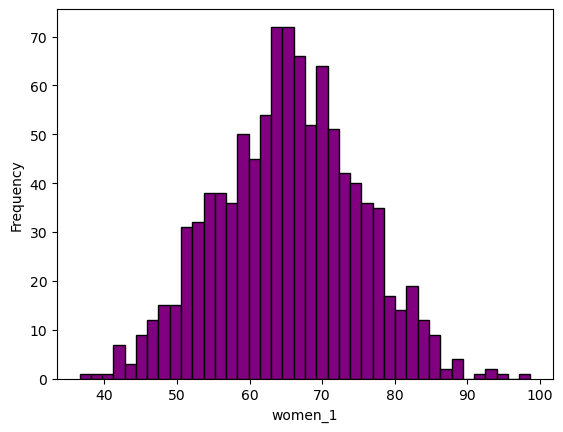

ShapiroResult(statistic=0.9983529448509216, pvalue=0.4624536335468292)

In [3]:
women1_hist = data_1['women_1'].plot.hist(bins = 40, color = 'purple', edgecolor = 'black')
plt.xlabel('women_1')
plt.show(women1_hist)
shapiro(data_1['women_1']) #performing shapiro test to check assumption normality

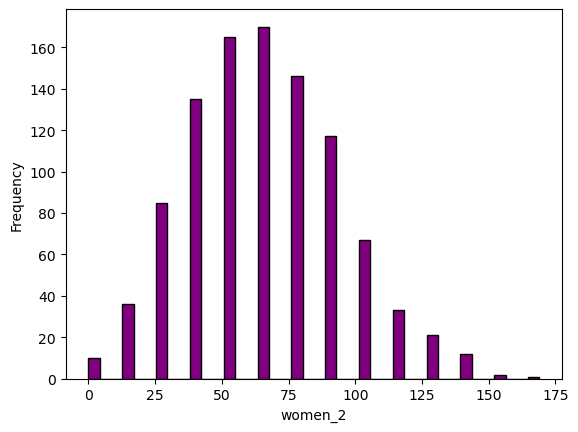

ShapiroResult(statistic=0.9753991365432739, pvalue=5.60890309891926e-12)

In [4]:
women2_hist = data_1['women_2'].plot.hist(bins = 40, color = 'purple', edgecolor = 'black')
plt.xlabel('women_2')
plt.show(women2_hist)
shapiro(data_1['women_2']) #performing shapiro test to check assumption normality


### 1.2 Check one of the following hypotheses (based on where the normality assumption is met) using t-test with appropriate paramenters:

**1.**
* HO - women_1 have bigger weight than men
* H1 - they are not

**2.**
* HO - women_2 have the same weight as men
* H1 - they are not

In [9]:
from scipy.stats import ttest_ind
#checking the first hypothesis
print("Hypothesis 1: ", ttest_ind(data_1['women_1'], data_1['men'], alternative='greater'))

Hypothesis 1:  Ttest_indResult(statistic=-32.56678896106208, pvalue=1.0)


## Task 2. ANOVA (2 points)

Calcium is an essential mineral that regulates the heart, is important for blood clotting and for building healthy bones. The National Osteoporosis Foundation recommends a daily calcium intake of 1000-1200 mg/day for adult men and women. While calcium is contained in some foods, most adults do not get enough calcium in their diets and take supplements. Unfortunately some of the supplements have side effects such as gastric distress, making them difficult for some patients to take on a regular basis.  

 A study is designed to test whether there is a difference in mean daily calcium intake in adults with normal bone density, adults with osteopenia (a low bone density which may lead to osteoporosis) and adults with osteoporosis. Adults 60 years of age with normal bone density, osteopenia and osteoporosis are selected at random from hospital records and invited to participate in the study. Each participant's daily calcium intake is measured based on reported food intake and supplements. The data are shown below. 

Key steps to follow:

* Checking assumptions for ANOVA
* Performing Anova
* Interpret the results (in markdown or as a comment)

In [10]:
anova_raw = {
    'Normal Bone Density': [1200, 1000, 980, 900, 750, 800],
    'Osteopenia': [1000, 1100, 700, 800, 500, 700],
    'Osteoporosis': [890, 650, 1100, 900, 400, 350]
}

### 2.1 Check assumptions for normality using Shapiro-Wilk test

In [11]:
print(shapiro(anova_raw['Normal Bone Density']))
print(shapiro(anova_raw['Osteopenia']))
print(shapiro(anova_raw['Osteoporosis']))

ShapiroResult(statistic=0.9554203748703003, pvalue=0.7838429808616638)
ShapiroResult(statistic=0.9552926421165466, pvalue=0.7828269004821777)
ShapiroResult(statistic=0.9214757680892944, pvalue=0.5160530805587769)


### 2.2 Сheck the assumption of homogeneity of variances

In [12]:
from scipy.stats import levene
data = list(anova_raw.values())
statistic, p_value = levene(*data)
if p_value > 0.05:
    print("The assumption of homogeneity of variances holds.")
else:
    print("The assumption of homogeneity of variances does not hold.")

The assumption of homogeneity of variances holds.


### 2.3 Perform ANOVA and interpret the results

In [13]:
from scipy.stats import f_oneway
data = list(anova_raw.values())
statistic, p_value = f_oneway(*data)

if p_value < 0.05:
    print("The p-value is less than 0.05, indicating a significant difference between groups.")
else:
    print("The p-value is greater than or equal to 0.05, indicating no significant difference between groups.")

The p-value is greater than or equal to 0.05, indicating no significant difference between groups.


## Task 3. Linear Regression

Given the Dataset in `task_3.csv` make some necessary transformations and train regression model to predict flight tickets' price.

### Dataset Description

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

**Dataset**
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

**Features**

The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

*Dataset is already cleaned*


### 3.1 Data Transformation:

- Transform categorical variables to numeric form. Decide on the most appropriate method, such as one-hot encoding, label encoding, or any other relevant technique.
- Provide justifications for the chosen transformation method and discuss any variables that might be excluded.

In [63]:
#reading data
data = pd.read_csv("task_3.csv")
categorical_columns = [key for key in data.keys() if data[key].dtype == "object"]

#using one-hot encoding for the categorical columns
data_onehot = pd.get_dummies(data, columns=['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']) 

#one-hot encoded categorical features not counting the flight column
data_onehot_1 = pd.get_dummies(data, columns=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']) 

In [29]:
data

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# Justifications for the chosen encoding
One-hot encoding is the most suitable one in this case because it is normally used when the categorical columns 
don't have an inherent order or hierarchy and that's exactly what we have in our case(unlike, for example, label encoding 
which is appropriate when the categorical columns have a specific order or hierarchy);

Regarding variables that might be excluded, i have some variants:
  1) the column 'days_left' may be excluded in some cases, because it's not always that the booking date effects the tickets' prices
  (it depends on the price policy of the airline)
  2) also the column 'flight' which has the code of the flight does not provide lots of useful information when we want to predict the tickets' prrices, so it possibly may be omitted

### 3.2 Visualization of Variables:

- Visualize the correlation between variables. Use techniques like correlation matrices or heatmap to represent relationships between different features.
- Discuss any interesting observations or patterns identified during visualization.

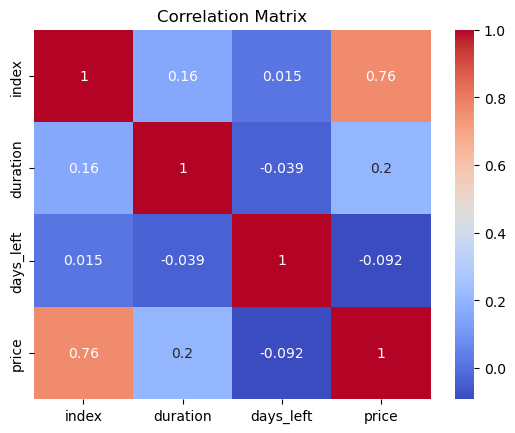

In [57]:
import seaborn as sns
#for the numeric columns before transforming the categorical ones
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

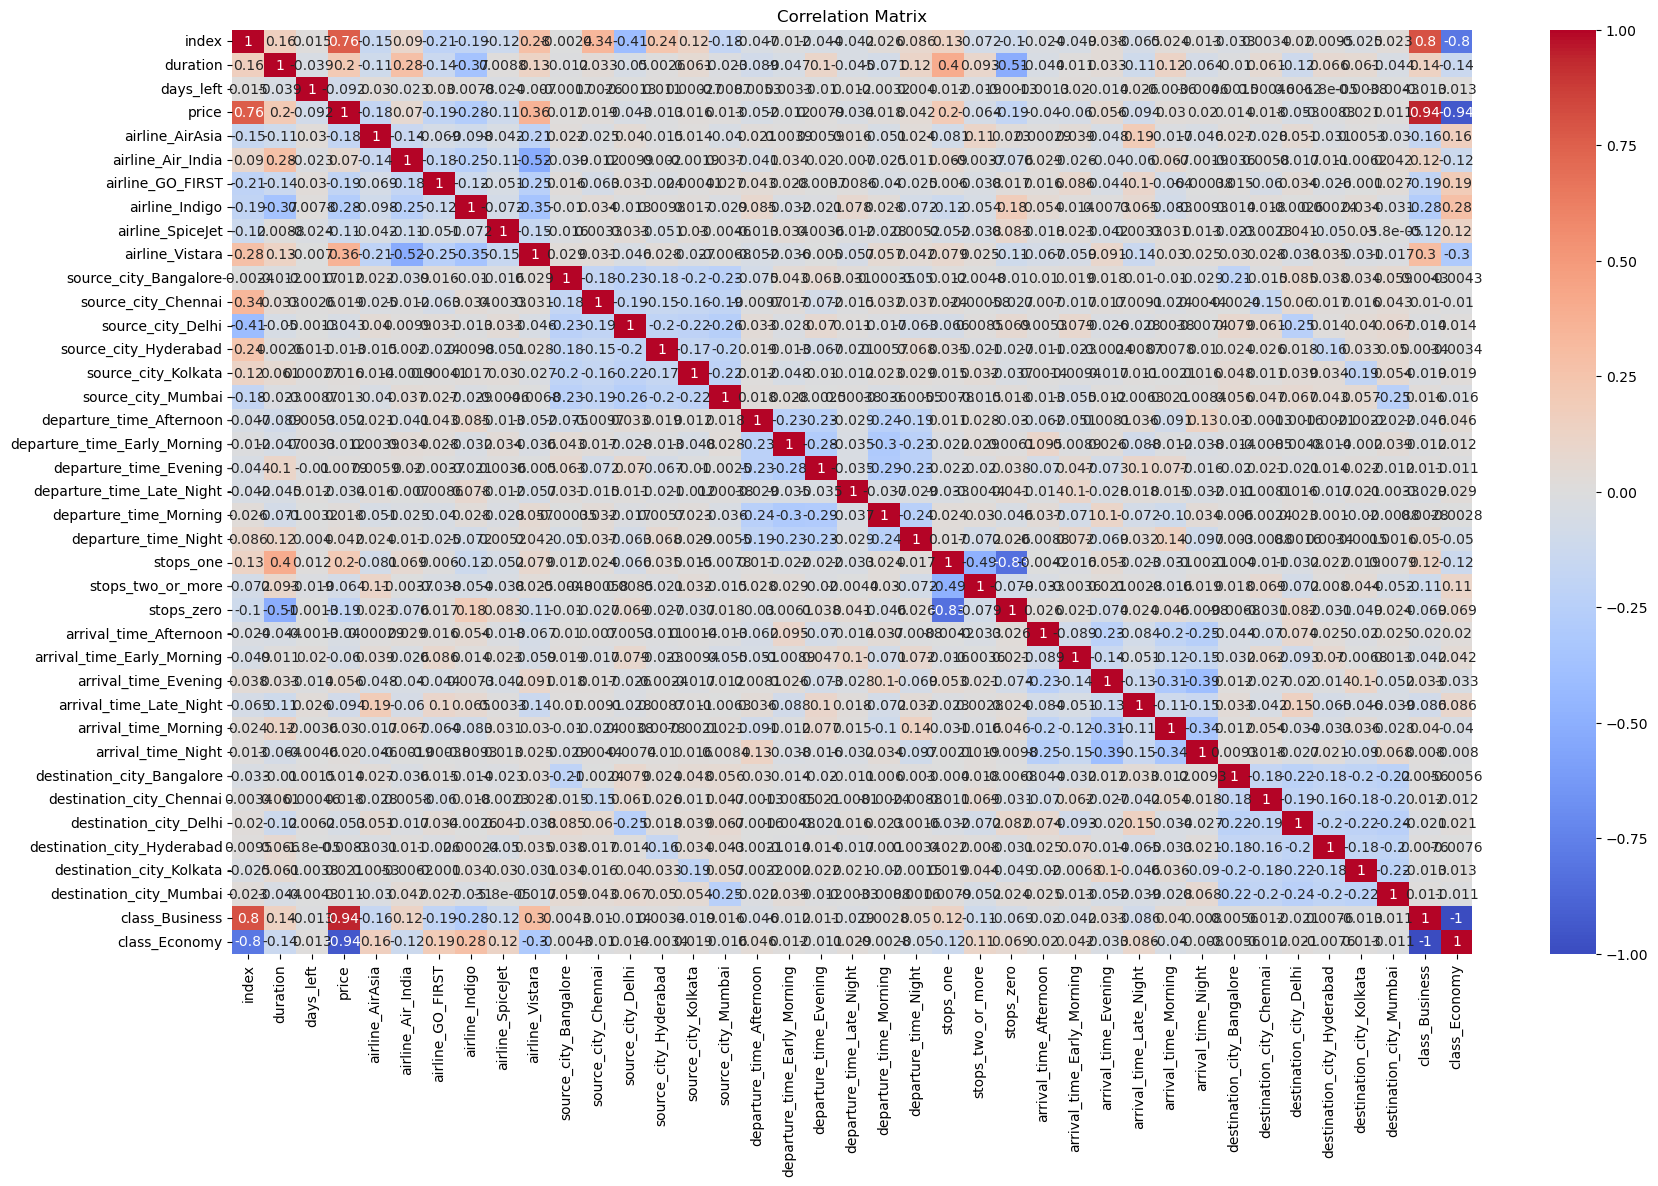

In [60]:
correlation_matrix = data_onehot_1.corr()
#for the numeric columns after transforming the categorical ones except for the flight
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

price and business(economy) class columns are correlated
business and economy class columns are correlated
stops_zero and stops_one columns are correlated

### 3.3 Optional Graphs:

- Create additional graphs that you find helpful and insightful for understanding the dataset.
- Examples of optional graphs include distribution plots, box plots, or any other visualization that might provide useful insights. 

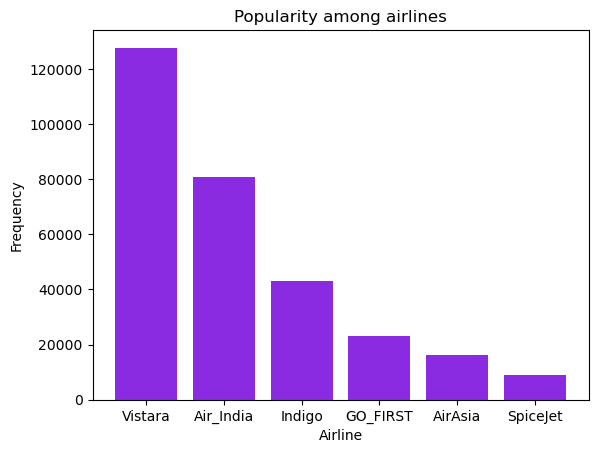

In [18]:
#a bar chart to illustrate the popularity among the airlines
count_airlines = data['airline'].value_counts()
plt.bar(count_airlines.index, count_airlines.values, color = 'BlueViolet')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.title('Popularity among airlines')
plt.show()

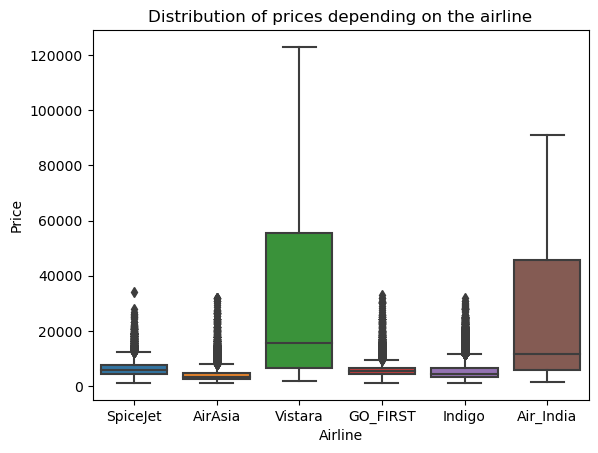

In [21]:
#a box plot to show the distribution of prices depending on the airline
import seaborn as sns
sns.boxplot(x='airline', y='price', data=data)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Distribution of prices depending on the airline')
plt.show()

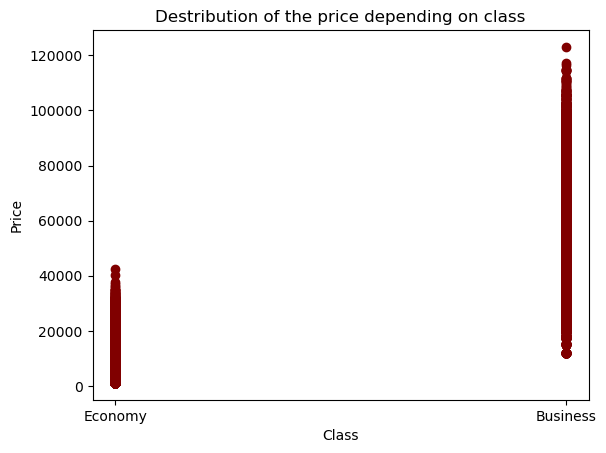

In [22]:
#a scatter to shoe the destribution for the prices for different classes
plt.scatter(data['class'], data['price'], color = 'maroon')
plt.xlabel('Class')
plt.ylabel('Price')
plt.title('Destribution of the price depending on class')
plt.show()

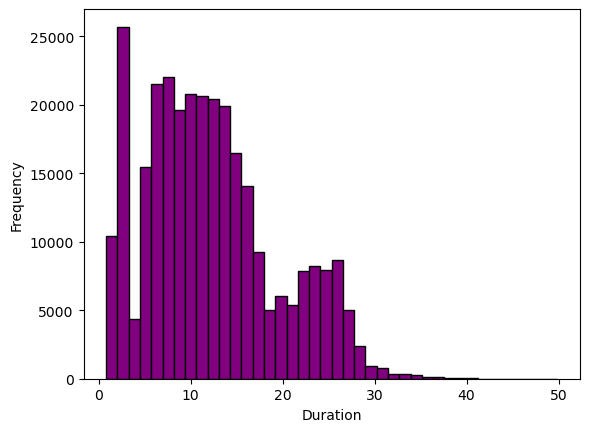

In [23]:
#a histogram to show the distribution of the duration
duration_hist = data['duration'].plot.hist(bins = 40, color = 'purple', edgecolor = 'black')
plt.xlabel('Duration')
plt.show(duration_hist)

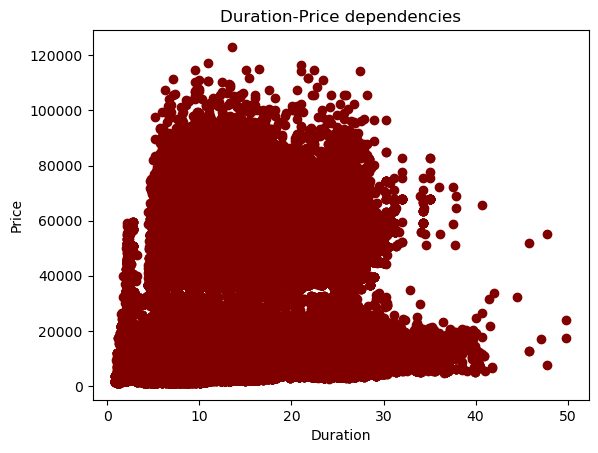

In [24]:
#a scatter plot to illustrate the dependencies between the duration of the flight and prices
plt.scatter(data['duration'], data['price'], color = 'maroon')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Duration-Price dependencies')
plt.show()

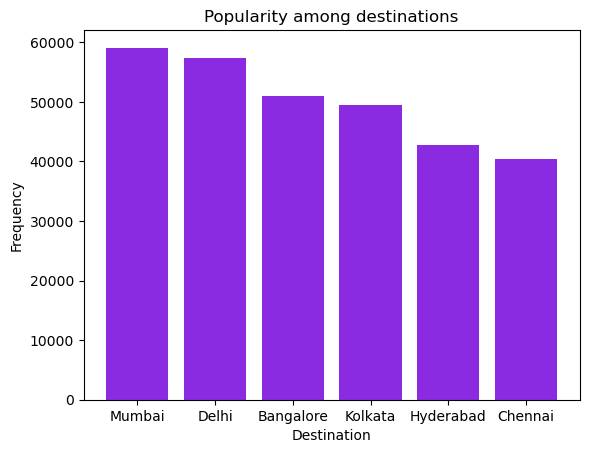

In [25]:
#a bar chart to illustrate the popularity of a particular destination
count_destination = data['destination_city'].value_counts()
plt.bar(count_destination.index, count_destination.values, color = 'BlueViolet')
plt.xlabel('Destination')
plt.ylabel('Frequency')
plt.title('Popularity among destinations')
plt.show()

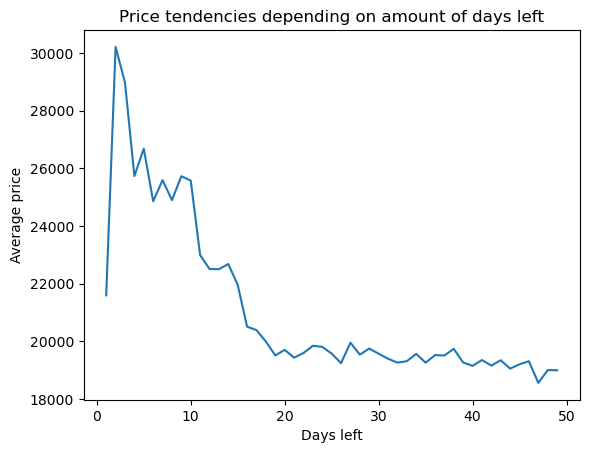

In [27]:
#a line plot to visualize the tendencies of the prices depending on the days left
average_price = data.groupby('days_left')['price'].mean()
plt.plot(average_price.index, average_price.values)
plt.xlabel('Days left')
plt.ylabel('Average price')
plt.title('Price tendencies depending on amount of days left')
plt.show()

### 3.4 Linear Regression:
- Perform linear regression to predict ticket prices based on relevant independent variables. Choose variables that are likely to influence the ticket price.
- Evaluate the results using R squared (coefficient of determination) to assess the goodness of fit of the regression model.
- Provide interpretation of the coefficients and discuss the overall performance of the model.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = data_onehot_1[['duration', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_city_Bangalore',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'stops_one', 'stops_two_or_more', 'stops_zero', 'class_Business', 'class_Economy']]
y = data_onehot_1['price']

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#evaluating the result
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

#coefficients = model.coef_

R-squared:  0.9023547721237004


As we can see the value we got is approximately 90.23% which is quite good, so the conclusion is that the chosen model is suitable for predictiong tickets' prices and is able to do it pretty accurately

## Task 4. Classification (3 points)

Given the Dataset in `task_4.csv` make some necessary transformations and train the model to classify the obesity type.

### Dataset Description

The data contains 17 attributes and 2111 records, the records are labeled with the **class variable NObesity (Obesity Level), that allows classification of the data** using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS), other variables obtained were: Gender, Age, Height and Weight.

**Questions of the survey used for initial recollection of information**

Question (Possible Answers)

* What is your gender?	•Female •Male
* What is your age?	Numeric value
* What is your height?	Numeric value in meters
* What is your weight?	Numeric value in kilograms
* Has a family member suffered or suffers from overweight?	•Yes •No
* Do you eat high caloric food frequently? •Yes •No
* Do you usually eat vegetables in your meals?	•Never •Sometimes •Always
* How many main meals do you have daily?	•Between 1 y 2 •Three •More than three
* Do you eat any food between meals? •No •Sometimes •Frequently •Always
* Do you smoke? •Yes •No
* How much water do you drink daily? •Less than a liter •Between 1 and 2 L •More than 2 L
* Do you monitor the calories you eat daily? •Yes •No
* How often do you have physical activity? •I do not have •1 or 2 days •2 or 4 days •4 or 5 days
* How much time do you use technological devices such as cell phone, videogames, television, computer and others? •0–2 hours •3–5 hours •More than 5 hours
* How often do you drink alcohol? •I do not drink •Sometimes •Frequently •Always
* Which transportation do you usually use? •Automobile •Motorbike •Bike •Public Transportation •Walking


### 4.1 Data Preparation:

- Identify and handle missing values, outliers, or any other data quality issues.
- Convert categorical variables into a suitable format for modeling.
- Discuss any decisions made during the data cleaning process.

In [56]:
data_4 = pd.read_csv('task_4.csv')
data_4

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


as the example of the outliers we may consider the following:
   1) abnormal age (>= 120 or <=0) - there are no such values in the dataset
   2) abnormal height (>= 3) - there are no such values in the dataset
   3) abnormal weight (>= 500) - there are no such values in the dataset
   4) missing some values ('None' columns) - no such examples
   5) reorganizing particular columns to form them into categories and to make them answer the question as it is needed
   columns to reorganize: NCP, CH2O, TUE, FAF

In [57]:
#checking first 3 points
outliers = data_4[(data_4['Age'] >= 120) | (data_4['Age'] <= 0) | (data_4['Height'] >= 3) | (data_4['Weight'] >= 500)]
if (len(outliers) == 0):
    print('No abnormal values')

#checking 4) point
outliers_1 = []
for feature in list(data_4):
    outliers_1 = data_4[data_4[feature] == None]
if (len(outliers_1) == 0):
    print('No None values')
    
#reorganizing columns: NCP, CH2O, TUE
#NCP
condition_1 = (data_4['NCP'] >= 1) & (data_4['NCP'] <= 2)
data_4.loc[condition_1, 'NCP'] = 1

condition_2 = data_4['NCP'] == 3
data_4.loc[condition_2, 'NCP'] = 2

condition_3 = data_4['NCP'] > 3
data_4.loc[condition_3, 'NCP'] = 3

mapping = {
    1: 'Between 1 and 2',
    2: 'Three',
    3: 'More than three'
}
data_4['NCP'] = data_4['NCP'].map(mapping)

#CH2O
condition_1 = data_4['CH2O'] <= 1
data_4.loc[condition_1, 'CH2O'] = 1 #'<1'

condition_2 = (data_4['CH2O'] >= 1) & (data_4['CH2O'] <= 2)
data_4.loc[condition_2, 'CH2O'] = 2 #'1-2'

condition_3 = data_4['CH2O'] > 2
data_4.loc[condition_3, 'CH2O'] = 3 #'>2'

mapping = {
    1: '<1',
    2: '1-2',
    3: '>2'
}
data_4['CH2O'] = data_4['CH2O'].map(mapping)

#TUE
condition_1 = (data_4['TUE'] >= 0) & (data_4['TUE'] <= 2)
data_4.loc[condition_1, 'TUE'] = 1 #'0-2'

condition_2 = (data_4['TUE'] >= 3) & (data_4['TUE'] <= 5)
data_4.loc[condition_2, 'TUE'] = 2 #'3-5'

condition_3 = data_4['TUE'] > 5
data_4.loc[condition_3, 'TUE'] = 3 #'>5'

mapping = {
    1: '0-2',
    2: '3-5',
    3: '>5'
}
data_4['TUE'] = data_4['TUE'].map(mapping)


#FAF
condition_1 = (data_4['FAF'] >= 0) & (data_4['FAF'] < 1)
data_4.loc[condition_1, 'FAF'] = 1 #'0-1'

condition_2 = (data_4['FAF'] >= 1) & (data_4['FAF'] <= 2)
data_4.loc[condition_2, 'FAF'] = 2 #'1-2'

condition_3 = (data_4['FAF'] > 2) & (data_4['FAF'] <= 4)
data_4.loc[condition_2, 'FAF'] = 3 #'2-4'

condition_4 = (data_4['FAF'] > 4) & (data_4['FAF'] <= 5)
data_4.loc[condition_2, 'FAF'] = 4 #'4-5'

mapping = {
    1: '0-1',
    2: '1-2',
    3: '2-4',
    4: '4-5'
}
data_4['FAF'] = data_4['FAF'].map(mapping)


data_4

No abnormal values
No None values


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,Three,Sometimes,no,1-2,no,4-5,0-2,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,Three,Sometimes,yes,>2,yes,2-4,0-2,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,Three,Sometimes,no,1-2,no,4-5,0-2,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,Three,Sometimes,no,1-2,no,4-5,0-2,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,Between 1 and 2,Sometimes,no,1-2,no,4-5,0-2,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,Three,Sometimes,no,1-2,no,4-5,0-2,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,Three,Sometimes,no,>2,no,4-5,0-2,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,Three,Sometimes,no,>2,no,4-5,0-2,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,Three,Sometimes,no,>2,no,4-5,0-2,Sometimes,Public_Transportation,Obesity_Type_III


In [64]:
#Converting categorical variables into a suitable format for modeling
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'CALC', 'SCC', 'FAF', 'TUE', 'MTRANS']
encoded_dataset = pd.get_dummies(data_4, columns=categorical_features)

### 4.2 Training and Hyperparameter Tuning::

- Select a classification model for predicting 'NObeyesdad'
- Split the dataset into training and testing sets.
- Train the chosen model on the training set.

In [60]:
from sklearn.tree import DecisionTreeClassifier

features = encoded_dataset.drop('NObeyesdad', axis=1)
target = encoded_dataset['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.3 Model Evaluation:

- Evaluate the trained model on the testing set.
- Choose appropriate evaluation metrics for a classification task (e.g., accuracy, precision, recall, F1-score).

In [61]:
y_pred = model.predict(X_test)

In [62]:
#using different metrics to compare the accuracy counted using them
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9456264775413712
Precision: 0.9459600640142788
Recall: 0.9456264775413712
F1-score: 0.9456900226284166
